# Discovering the Sum of Natural Numbers — A Visual Jupyter Notebook

This interactive notebook follows the **student-friendly** Markdown course. Run each code cell to see results and play with the examples.

## Module 1 — What are natural numbers?

Natural numbers are the numbers we use for counting: 1, 2, 3, 4, ...

We'll explore sums like:

$$\sum_{x=1}^{n} x = 1 + 2 + \dots + n$$

Start by running the next cell to compute some triangular numbers.

In [2]:
# Compute triangular numbers for n = 1..12 and print them
def triangular(n):
    return n*(n+1)//2

for i in range(1,13):
    print(f"n={i:2d}  ->  sum 1..{i} = {triangular(i)}")

n= 1  ->  sum 1..1 = 1
n= 2  ->  sum 1..2 = 3
n= 3  ->  sum 1..3 = 6
n= 4  ->  sum 1..4 = 10
n= 5  ->  sum 1..5 = 15
n= 6  ->  sum 1..6 = 21
n= 7  ->  sum 1..7 = 28
n= 8  ->  sum 1..8 = 36
n= 9  ->  sum 1..9 = 45
n=10  ->  sum 1..10 = 55
n=11  ->  sum 1..11 = 66
n=12  ->  sum 1..12 = 78


## Module 2 — Visualizing the staircase and pairing trick

Below we draw the staircase (dots) for a chosen n, then create a flipped copy and show how they combine into a rectangle. Change `n` and re-run the cell.

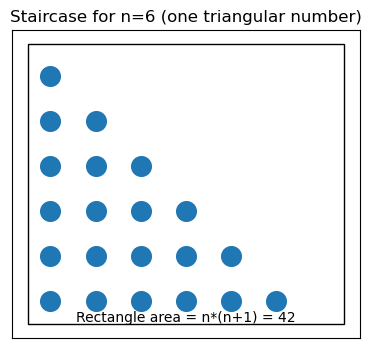

In [3]:
# Visualize staircase and its mirrored rectangle
import matplotlib.pyplot as plt
import numpy as np

def plot_staircase(n=5, show_rectangle=True):
    # Create coordinates for dots in a staircase: rows of increasing length
    xs, ys = [], []
    for row in range(1, n+1):
        for col in range(row):
            xs.append(col)
            ys.append(-row)  # negative so top row is at y=-1 visually

    fig, ax = plt.subplots(figsize=(6,4))
    ax.scatter(xs, ys, s=200)  # no color specified per instructions
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Staircase for n={n} (one triangular number)')

    if show_rectangle:
        # Draw mirrored staircase to form rectangle
        # Rectangle width = n+1, height = n (conceptual)
        rect = plt.Rectangle((-0.5, -n-0.5), n+1, n+0.2, fill=False, linewidth=1)
        ax.add_patch(rect)
        ax.text(n/2, -n-0.2, f'Rectangle area = n*(n+1) = {n*(n+1)}', ha='center', va='top')

    plt.show()

# Example
plot_staircase(n=6)

**Exercise:** Try changing `n` in the previous cell to 4, 7, or 10 and re-run. Notice how the rectangle width equals `n+1` and height `n`. The triangular (staircase) area is half the rectangle.

## Module 3 — Pairing algebraically

We use the trick of writing the sum forward and backward and adding termwise. The notebook below verifies the algebraic identity:

$$S = 1 + 2 + ... + n \Rightarrow 2S = n(n+1) \Rightarrow S = \frac{n(n+1)}{2}$$

Run for several values of n to verify.

In [4]:
# Verify pairing formula for many n and compare to direct sum
def sum_direct(n):
    return sum(range(1, n+1))

def sum_formula(n):
    return n*(n+1)//2

errors = []
for n in range(1,41):
    direct = sum_direct(n)
    form = sum_formula(n)
    if direct != form:
        errors.append((n, direct, form))

print('Checked n=1..40. Number of mismatches:', len(errors))
if errors:
    print(errors[:5])

Checked n=1..40. Number of mismatches: 0


## Module 4 — Sums of squares and cubes (explore)

Formulas:

$$\sum_{x=1}^n x^2 = \frac{n(n+1)(2n+1)}{6}$$

$$\sum_{x=1}^n x^3 = \left(\frac{n(n+1)}{2}\right)^2$$

Use the cells below to compute and compare values.

In [5]:
# Verify sum of squares and cubes formulas for various n
def sum_squares_direct(n):
    return sum(i*i for i in range(1, n+1))

def sum_squares_formula(n):
    return n*(n+1)*(2*n+1)//6

def sum_cubes_direct(n):
    return sum(i**3 for i in range(1, n+1))

def sum_cubes_formula(n):
    s = n*(n+1)//2
    return s*s

for n in [1,2,3,4,5,10,20,50]:
    print(f"n={n:2d} | squares: direct={sum_squares_direct(n):8d} formula={sum_squares_formula(n):8d} | cubes: direct={sum_cubes_direct(n):12d} formula={sum_cubes_formula(n):12d}")

n= 1 | squares: direct=       1 formula=       1 | cubes: direct=           1 formula=           1
n= 2 | squares: direct=       5 formula=       5 | cubes: direct=           9 formula=           9
n= 3 | squares: direct=      14 formula=      14 | cubes: direct=          36 formula=          36
n= 4 | squares: direct=      30 formula=      30 | cubes: direct=         100 formula=         100
n= 5 | squares: direct=      55 formula=      55 | cubes: direct=         225 formula=         225
n=10 | squares: direct=     385 formula=     385 | cubes: direct=        3025 formula=        3025
n=20 | squares: direct=    2870 formula=    2870 | cubes: direct=       44100 formula=       44100
n=50 | squares: direct=   42925 formula=   42925 | cubes: direct=     1625625 formula=     1625625


## Module 5 — Interactive exploration (change n, observe growth)

Below you can change the value of `n` and see numeric results and a simple plot of the growth of sums: ∑x, ∑x², ∑x³.

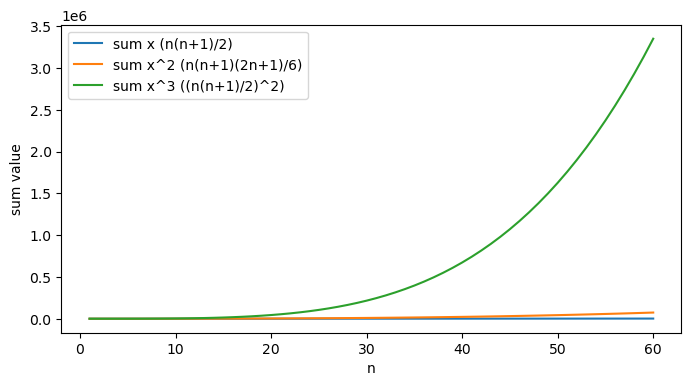

In [16]:
# Interactive exploration: compute sums and plot growth
import matplotlib.pyplot as plt

def compute_sums_up_to(max_n=100):
    ns = list(range(1, max_n+1))
    sum_x = [n*(n+1)/2 for n in ns]
    sum_x2 = [n*(n+1)*(2*n+1)/6 for n in ns]
    sum_x3 = [(n*(n+1)/2)**2 for n in ns]
    return ns, sum_x, sum_x2, sum_x3

# Set max_n here
max_n = 60
ns, sx, sx2, sx3

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(ns, sx, label='sum x (n(n+1)/2)')
ax.plot(ns, sx2, label='sum x^2 (n(n+1)(2n+1)/6)')
ax.plot(ns, sx3, label='sum x^3 ((n(n+1)/2)^2)')
ax.set_xlabel('n')
ax.set_ylabel('sum value')
ax.legend()
plt.show()

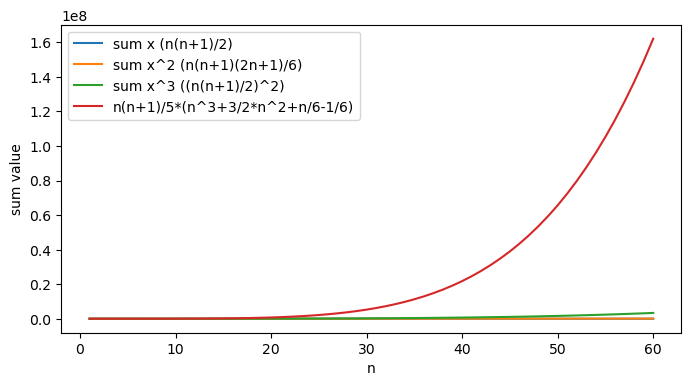

In [13]:
# Interactive exploration: compute sums and plot growth
import matplotlib.pyplot as plt

def compute_sums_up_to(max_n=100):
    ns = list(range(1, max_n+1))
    sum_x = [n*(n+1)/2 for n in ns]
    sum_x2 = [n*(n+1)*(2*n+1)/6 for n in ns]
    sum_x3 = [(n*(n+1)/2)**2 for n in ns]
    sum_x4 = [n*(n+1)/5*(n**3+3/2*n**2+n/6-1/6) for n in ns]  # Fixed: added * between n and (n+1), changed ^ to **, added list comprehension
    return ns, sum_x, sum_x2, sum_x3, sum_x4

# Set max_n here
max_n = 60
ns, sx, sx2, sx3, sx4 = compute_sums_up_to(max_n)

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(ns, sx, label='sum x (n(n+1)/2)')
ax.plot(ns, sx2, label='sum x^2 (n(n+1)(2n+1)/6)')
ax.plot(ns, sx3, label='sum x^3 ((n(n+1)/2)^2)')
ax.plot(ns, sx4, label='n(n+1)/5*(n^3+3/2*n^2+n/6-1/6)')  # Fixed: added closing parenthesis
ax.set_xlabel('n')
ax.set_ylabel('sum value')
ax.legend()
plt.show()

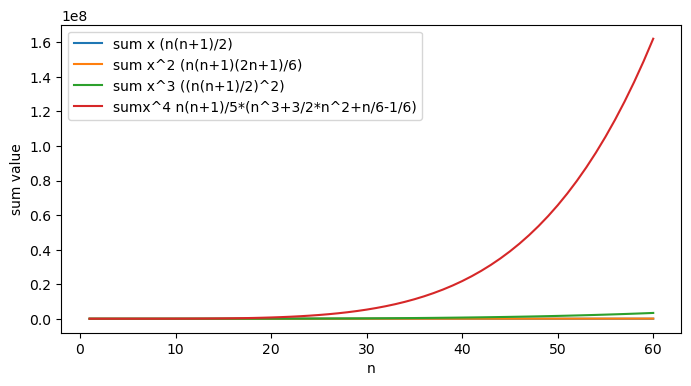

In [14]:
# Interactive exploration: compute sums and plot growth
import matplotlib.pyplot as plt

def compute_sums_up_to(max_n=100):
    ns = list(range(1, max_n+1))
    sum_x = [n*(n+1)/2 for n in ns]
    sum_x2 = [n*(n+1)*(2*n+1)/6 for n in ns]
    sum_x3 = [(n*(n+1)/2)**2 for n in ns]
    sum_x4 = [n*(n+1)/5*(n**3+3/2*n**2+n/6-1/6) for n in ns]  # Fixed: added * between n and (n+1), changed ^ to **, added list comprehension
    return ns, sum_x, sum_x2, sum_x3, sum_x4

# Set max_n here
max_n = 60
ns, sx, sx2, sx3, sx4 = compute_sums_up_to(max_n)

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(ns, sx, label='sum x (n(n+1)/2)')
ax.plot(ns, sx2, label='sum x^2 (n(n+1)(2n+1)/6)')
ax.plot(ns, sx3, label='sum x^3 ((n(n+1)/2)^2)')
ax.plot(ns, sx4, label='sumx^4 n(n+1)/5*(n^3+3/2*n^2+n/6-1/6)')  # Fixed: added closing parenthesis
ax.set_xlabel('n')
ax.set_ylabel('sum value')
ax.legend()
plt.show()

**Challenge:** Try increasing `max_n` to 200 or 1000 and re-run the cell. Observe how the cubic sum grows much faster than linear or quadratic sums.

## Module 6 — Exercises

1. Compute the sum 1+2+...+100 using the formula. Confirm by direct computation.
2. Compute ∑x² for n = 100 and use it to find the variance of numbers 1..100 (population variance).
3. Prove (on paper) that ∑x³ = (∑x)² using algebraic manipulation or a simple induction argument.

Run the code cell below to get answers for exercises 1 and 2.

In [7]:
# Exercise answers for quick-check
def triangular(n): return n*(n+1)//2
def sum_squares_formula(n): return n*(n+1)*(2*n+1)//6

n = 100
S = triangular(n)
S2 = sum_squares_formula(n)

# population mean of numbers 1..n
mean = S / n
# population variance = (1/n) * sum[(x-mean)^2] = (1/n)*sum(x^2) - mean^2
variance = (S2 / n) - (mean**2)

S, S2, mean, variance

(5050, 338350, 50.5, 833.25)

## Module 7 — Further reading and next steps

If you enjoyed this notebook you can:

- Try implementing proofs by induction for the formulas.
- Explore Faulhaber's formula and Bernoulli numbers (advanced).
- Use the notebook to create visual slides for teaching. 

---

